In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# url_2018 = "https://github.com/ryurko/nflscrapR-data/raw/master/play_by_play_data/regular_season/reg_pbp_2018.csv"
url_2019 = "https://github.com/ryurko/nflscrapR-data/raw/master/play_by_play_data/regular_season/reg_pbp_2019.csv"

# _2018 = pd.read_csv(url_2018)
_2019 = pd.read_csv(url_2019)

In [3]:
"""
stack the data so we have one df
delete other dfs to save on memory 
"""
# df = pd.concat([_2018, _2019], ignore_index=True)
# del _2018
# del _2019
df = _2019
max(pd.to_datetime(df['game_date']))

Timestamp('2019-11-25 00:00:00')

In [4]:
"""
goal is to filter to only dropbacks
"""
def drop_rows(data, mask):
    data = data[mask]
    return data

mask = df['play_type'] == "pass"
df = drop_rows(df, mask)
# mask = pd.notnull(df['epa'])
# df = drop_rows(df, mask)

In [5]:
"""
printing each columns so we can look at what we need
"""
col_list = list(df.columns.values)
print(col_list)

['play_id', 'game_id', 'home_team', 'away_team', 'posteam', 'posteam_type', 'defteam', 'side_of_field', 'yardline_100', 'game_date', 'quarter_seconds_remaining', 'half_seconds_remaining', 'game_seconds_remaining', 'game_half', 'quarter_end', 'drive', 'sp', 'qtr', 'down', 'goal_to_go', 'time', 'yrdln', 'ydstogo', 'ydsnet', 'desc', 'play_type', 'yards_gained', 'shotgun', 'no_huddle', 'qb_dropback', 'qb_kneel', 'qb_spike', 'qb_scramble', 'pass_length', 'pass_location', 'air_yards', 'yards_after_catch', 'run_location', 'run_gap', 'field_goal_result', 'kick_distance', 'extra_point_result', 'two_point_conv_result', 'home_timeouts_remaining', 'away_timeouts_remaining', 'timeout', 'timeout_team', 'td_team', 'posteam_timeouts_remaining', 'defteam_timeouts_remaining', 'total_home_score', 'total_away_score', 'posteam_score', 'defteam_score', 'score_differential', 'posteam_score_post', 'defteam_score_post', 'score_differential_post', 'no_score_prob', 'opp_fg_prob', 'opp_safety_prob', 'opp_td_prob'

In [6]:
"""
creating our df for WRs. This is manual as I wanted to sift through 
and decide which columns I would like to use in my analysis
"""
wr_df = df[["receiver_player_id","receiver_player_name", "epa", "air_yards","pass_length",
            "pass_location","td_prob","total_home_epa", "total_away_epa","total_home_pass_epa",
            "total_away_pass_epa","yac_epa","air_epa","comp_air_epa","comp_yac_epa","home_wp",
            "away_wp", "wpa", 'air_wpa', 'yac_wpa', 'comp_air_wpa', 'comp_yac_wpa',"incomplete_pass",
            "interception","pass_attempt","touchdown", "pass_touchdown", "complete_pass"]]
wr_df

,receiver_player_id,receiver_player_name,epa,air_yards,pass_length,pass_location,td_prob,total_home_epa,total_away_epa,total_home_pass_epa,...,air_wpa,yac_wpa,comp_air_wpa,comp_yac_wpa,incomplete_pass,interception,pass_attempt,touchdown,pass_touchdown,complete_pass
2,00-0033293,A.Jones,-0.987734,-1.0,short,left,0.292202,1.752097,-1.752097,0.987734,...,-3.164725e-02,5.559028e-03,-3.164725e-02,5.559028e-03,0.0,0.0,1.0,0.0,0.0,1.0
3,NaN,NaN,-2.221273,NaN,NaN,NaN,0.239902,3.973370,-3.973370,3.209007,...,NaN,NaN,0.000000e+00,0.000000e+00,0.0,0.0,1.0,0.0,0.0,0.0
7,00-0031428,A.Robinson,-0.823953,2.0,short,left,0.442820,2.872498,-2.872498,2.385054,...,-2.128105e-02,-4.616836e-03,0.000000e+00,0.000000e+00,1.0,0.0,1.0,0.0,0.0,0.0
9,00-0033556,T.Cohen,-0.526357,15.0,short,left,0.489705,3.872497,-3.872497,1.858697,...,2.275751e-02,-4.005698e-02,0.000000e+00,0.000000e+00,1.0,0.0,1.0,0.0,0.0,0.0
11,NaN,NaN,-1.966319,NaN,NaN,NaN,0.341555,1.181622,-1.181622,-0.107622,...,NaN,NaN,0.000000e+00,0.000000e+00,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31343,00-0033110,T.Higbee,-0.507136,0.0,short,right,0.186675,-44.413546,44.413546,-34.965105,...,7.141131e-08,0.000000e+00,7.141131e-08,0.000000e+00,0.0,0.0,1.0,0.0,0.0,1.0
31345,00-0033908,C.Kupp,-0.078254,30.0,deep,left,0.147098,-44.491799,44.491799,-35.043358,...,1.719710e-06,-1.532825e-06,0.000000e+00,0.000000e+00,1.0,0.0,1.0,0.0,0.0,0.0
31346,00-0030431,R.Woods,2.820240,7.0,short,middle,0.077772,-41.671560,41.671560,-32.223119,...,-6.624693e-07,4.456753e-06,-6.624693e-07,4.456753e-06,0.0,0.0,1.0,0.0,0.0,1.0
31347,00-0030431,R.Woods,0.288644,6.0,short,right,0.295068,-41.382916,41.382916,-31.934475,...,7.602360e-07,9.158433e-07,7.602360e-07,9.158433e-07,0.0,0.0,1.0,0.0,0.0,1.0


In [21]:
# wr_df.pass_touchdown.value_counts()

0.0    12562
1.0      542
Name: pass_touchdown, dtype: int64

I want to try and see if I can identify "clutch" WRs. To do this I will filter by toudchdown plays, filter by players with at least 5 touch downs, and then calculate Mean EPA and Mean Touchdown probability then plot them against each other 

In [15]:

mask = wr_df['touchdown'] == 1
tds = drop_rows(wr_df, mask)
#filltering by having more than 5 Tds
tds = tds[tds.groupby("receiver_player_name")['receiver_player_name'].transform('size') >= 5]
# tds.receiver_player_name.value_counts()

In [16]:
td_df = tds[["receiver_player_name","epa","touchdown","td_prob"]]
td_df = td_df.dropna(subset=['receiver_player_name'])
td_df.head(10)

,receiver_player_name,epa,touchdown,td_prob
411,T.McLaurin,6.040785,1.0,0.306364
564,C.Beasley,-6.608273,1.0,0.273371
708,J.Brown,4.839464,1.0,0.289189
739,A.Thielen,3.189541,1.0,0.448448
867,C.Ridley,4.687990,1.0,0.127457
918,M.Brown,3.800162,1.0,0.469660
929,M.Brown,7.746265,1.0,0.274359
1048,M.Andrews,3.797157,1.0,0.173751
1097,D.Chark,4.319623,1.0,0.351854
1407,J.Landry,-7.974306,1.0,0.220681


In [17]:
td_df = td_df.groupby('receiver_player_name').mean()
td_df = td_df.reset_index()

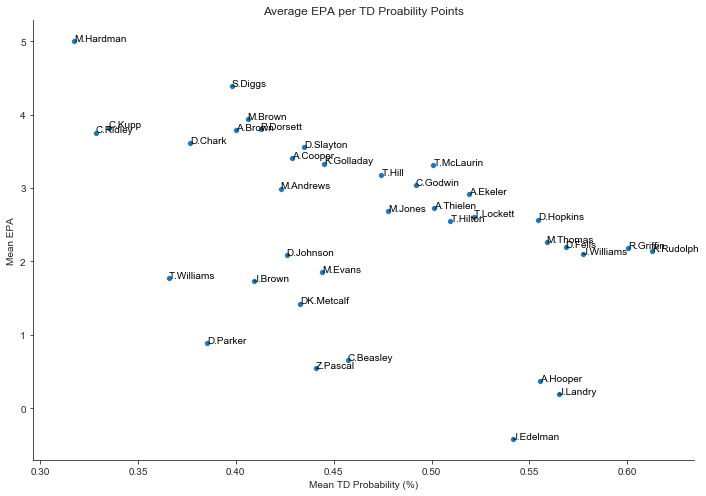

In [18]:
# sns.set_style("white", {'grid.linestyle': '--'})
sns.set_style("ticks", {'grid.linestyle': '--'})
##sns.set(style="white", palette="muted", color_codes=True)
# sns.set(style="white", palette="muted", color_codes=True)

fig, ax = plt.subplots(figsize=(10,7))

p1 = sns.scatterplot(x='td_prob',
                y='epa',
                data=td_df)
sns.despine(top=True, right=True, left=False, bottom=False)

plt.title('Average EPA per TD Proability Points',
           fontsize=12, loc="center")
ax.set(ylabel="Mean EPA")
ax.set(xlabel="Mean TD Probability (%)")

for line in range(0,td_df.shape[0]):
     p1.text(td_df.td_prob[line], td_df.epa[line], 
             td_df.receiver_player_name[line], 
             horizontalalignment='left', size='medium', color='black')

plt.tight_layout()
plt.show()

Higher and to the left signifies players who have more EPA on lower proability touchdowns or are more "clutch". I'm not sure how I feel about this measure so I'm going to take a look at WRs in a couple different ways

Let's check the Air Yards Leaders this Season

In [19]:
air = wr_df[["receiver_player_name","air_yards"]]
air = air.dropna(subset=['receiver_player_name'])
air = air.groupby('receiver_player_name').sum()
air = air.sort_values('air_yards', ascending=False)
air = air.reset_index()
air = air[:20]

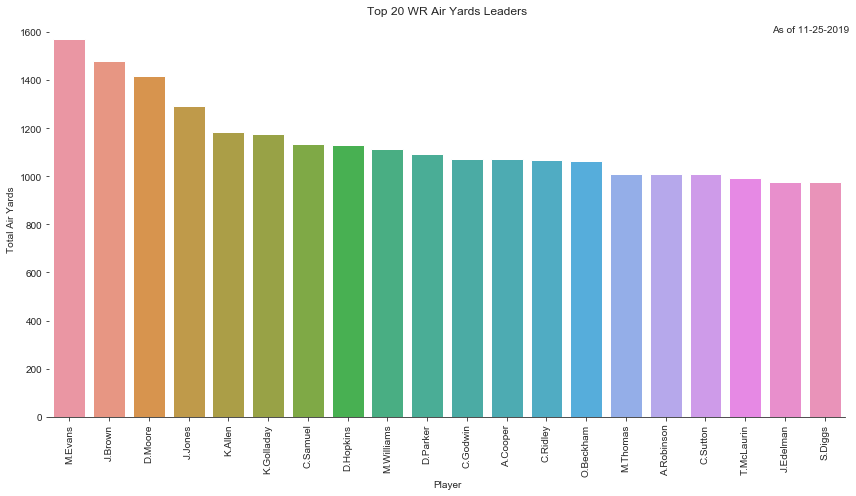

In [20]:
# sns.set_style("white", {'grid.linestyle': '--'})
sns.set_style("ticks", {'grid.linestyle': '--'})
##sns.set(style="white", palette="muted", color_codes=True)
# sns.set(style="white", palette="muted", color_codes=True)

fig, ax = plt.subplots(figsize=(12,7))

sns.barplot(x='receiver_player_name',
            y='air_yards',
            data=air)

sns.despine(top=True, right=True, left=True, bottom=False)

plt.title('Top 20 WR Air Yards Leaders',
           fontsize=12, loc="center")
ax.set(ylabel="Total Air Yards")
ax.set(xlabel="Player")

plt.xticks(rotation=90, 
           horizontalalignment='center',
           fontweight='light')

# ax.text(16, -5, "As of 11-25-2019")

ax.annotate("As of 11-25-2019", xy=(1,1), xycoords="axes fraction",
                    xytext=(5,-5), textcoords="offset points",
                    ha="right", va="top")
# for line in range(0,td_df.shape[0]):
#      p1.text(td_df.td_prob[line], td_df.epa[line], 
#              td_df.receiver_player_name[line], 
#              horizontalalignment='left', size='medium', color='black')

plt.tight_layout()
plt.show()

While this is interesting, this doesn't tell me much. What is interesting is that Jarvis Landry appears on the EPA chart but not the air yards chart. I'll look into OBJ vs Landry later

In [36]:
comps = wr_df[["receiver_player_name","complete_pass"]]
comps = comps.dropna(subset=['receiver_player_name'])
comps_sum = comps.groupby('receiver_player_name').sum()
comps_sum = comps_sum.reset_index()
counts = pd.DataFrame(comps.receiver_player_name.value_counts())
counts = counts.reset_index()
counts = counts.rename(columns={"receiver_player_name":"total_passes",
                                "index":"receiver_player_name"})

comps = air.merge(comps_sum, how='inner', on="receiver_player_name")
comps = comps.merge(counts, how='inner', on='receiver_player_name')

In [39]:
comps['comp_pct'] = comps['complete_pass'] / comps['total_passes']

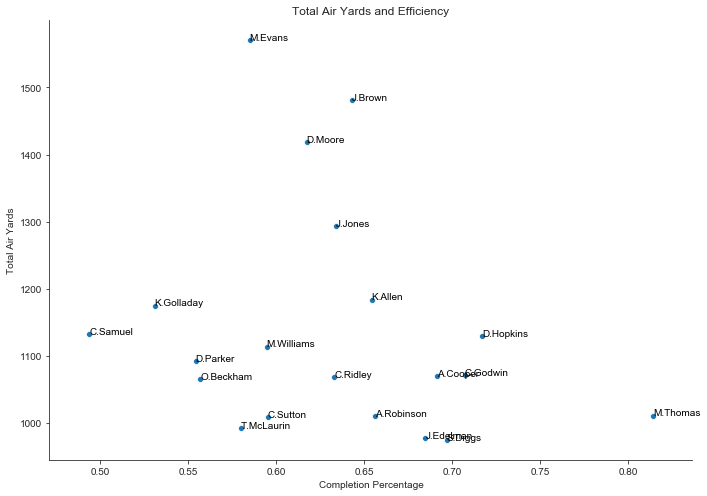

In [41]:
# sns.set_style("white", {'grid.linestyle': '--'})
sns.set_style("ticks", {'grid.linestyle': '--'})
##sns.set(style="white", palette="muted", color_codes=True)
# sns.set(style="white", palette="muted", color_codes=True)

fig, ax = plt.subplots(figsize=(10,7))

p1 = sns.scatterplot(x='comp_pct',
                     y='air_yards',
                     data=comps)
sns.despine(top=True, right=True, left=False, bottom=False)

plt.title('Total Air Yards and Efficiency',
           fontsize=12, loc="center")
ax.set(ylabel="Total Air Yards")
ax.set(xlabel="Completion Percentage")

for line in range(0,comps.shape[0]):
     p1.text(comps.comp_pct[line], comps.air_yards[line], 
             comps.receiver_player_name[line], 
             horizontalalignment='left', size='medium', color='black')

plt.tight_layout()
plt.show()

Not super telling...let's try looking at Air Yards Per Completion

In [43]:
comps['air_yards_pcmp'] = comps['air_yards'] / comps['complete_pass']

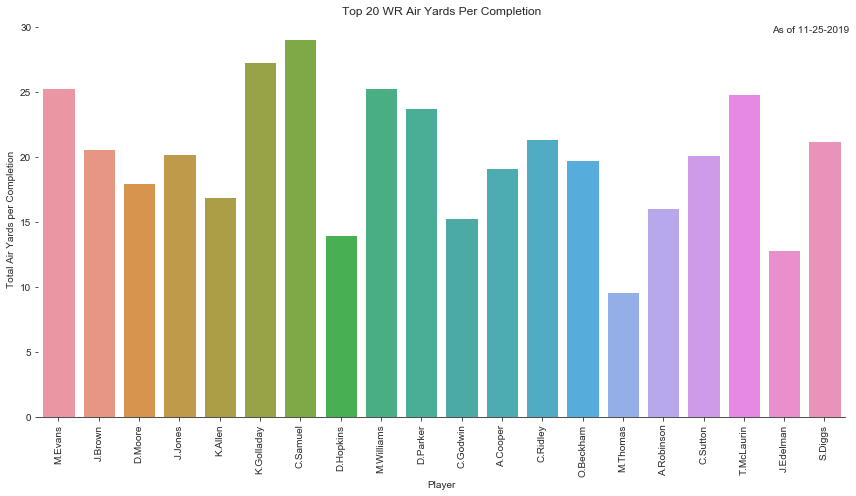

In [45]:
# sns.set_style("white", {'grid.linestyle': '--'})
sns.set_style("ticks", {'grid.linestyle': '--'})
##sns.set(style="white", palette="muted", color_codes=True)
# sns.set(style="white", palette="muted", color_codes=True)

fig, ax = plt.subplots(figsize=(12,7))

sns.barplot(x='receiver_player_name',
            y='air_yards_pcmp',
            data=comps)

sns.despine(top=True, right=True, left=True, bottom=False)

plt.title('Top 20 WR Air Yards Per Completion',
           fontsize=12, loc="center")
ax.set(ylabel="Total Air Yards per Completion")
ax.set(xlabel="Player")

plt.xticks(rotation=90, 
           horizontalalignment='center',
           fontweight='light')


ax.annotate("As of 11-25-2019", xy=(1,1), xycoords="axes fraction",
                    xytext=(5,-5), textcoords="offset points",
                    ha="right", va="top")


plt.tight_layout()
plt.show()